# The Wisdom of the Crowd 
 

- Individual should be big.
- Individual performance should be greather than 50%.
- Individual performance should be differently diversify.

# Voting Classifier

In [60]:
# Voting Classifier

from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import VotingClassifier

In [61]:
model_1 =SGDClassifier(random_state=0)
model_2 = DecisionTreeClassifier(random_state=0)
model_3=KNeighborsClassifier(n_neighbors=2)

model_4=VotingClassifier([('SGD',model_1),('Tree',model_2),('KNN',model_3)],voting='hard')

for model in (model_1,model_2,model_3,model_4):
    model.fit(X_train,y_train)
    print(model.__class__.__name__,model.score(x_test,y_test))

SGDClassifier 0.84
DecisionTreeClassifier 0.86
KNeighborsClassifier 0.86
VotingClassifier 0.8733333333333333


- VotingRegressor:
    - VotingRegressor : The final prediction is the average of the predictions.(Estimate the price of an appartment , average of the prediction will be calculate.)
        
        
- VotingClassifier:
    - Hard Voting : Vote on predictions.(If the majority say 1 we pick 1 , if maj say 0 we pick 0)
    - Soft Votng : Vote on the probabilities of each class.(Accumulate the probabilities of each class , we sum all probability of 1 and all probability of 0 for each estimators and we pick the majority probability. Ex : Prob to be 1 : 70 + 60 + 10 = 130 , Prob to be 0 : 30+40+90=160  We pick 1.)
        
        
SoftVoting is used for model that issue probabilities

# Bagging 



# Bagging (Overfitting problems): 
    - Makes it possible to obtain diverse sets of models by training each model on a random portion of the data (by sampling the dataset with Bootstrapping)
    - Create several copies of the same model by training each copy on a random part of the Dataset.
    - Parallel Training.(Over Fitting),each model is strong but Over Fit his subset. So if we gather all results we reduce the variance.


In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

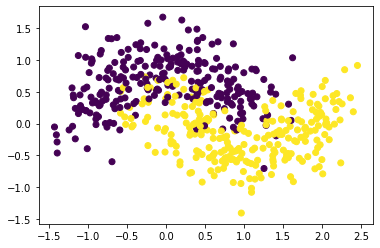

In [63]:
X,y= make_moons(n_samples=500,noise=0.3,random_state=0)
plt.scatter(X[:,0],X[:,1],c=y)

In [64]:
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=0)

In [65]:
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier

- n_estimators : 
  - This is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees give you better performance but makes your code slower.

In [66]:
model=BaggingClassifier(base_estimator=KNeighborsClassifier(),n_estimators=100)

In [67]:
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8866666666666667

In [68]:
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.88

# Boosting

# Boosting (Underfitting problems): 
    - Allows you to build models one after the other, by asking each model to correct the errors of its predecessor. (Adaboost and GradientBoosting are examples of algorithms).
    - Serie Training.(Under fitting) each model is low so if we construct one model over an other we can reduce the Bias.

In [69]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [70]:
model=AdaBoostClassifier(n_estimators=100)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.88

# Stacking


# Stacking (When you have trained your models with a lot of iterations ): 
    - Allows you to train a machine learning model to recognize who is wrong and who is right in a set of models, which further improves overall performance!
    
    - Instead of collecting the predictions of each model, we ask a FINAL_ESTIMATOR to learn how to predict the final result based on these predictions.

In [71]:
from sklearn.ensemble import StackingClassifier

In [72]:
model=StackingClassifier([('SGD',model_1),('Tree',model_2),('KNN',model_3)],final_estimator=KNeighborsClassifier())

In [73]:
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8666666666666667

# Bias and Variance happen to be one of the core parameters to tune while training a ML/DL model



- Bias: It happens to be the tendency of an ML model to consistently learn the wrong relations by not taking in account all the features given for the training.

A ML model with high bias won't be able to learn relations between features effectively and hence would Underfit on the dataset leading to low accuracy while predicting.

- Variance: It's explained as the amount by which the target function changes while it's being trained on data. Alternatively, it's the flexibility of the Model to tune itself with the data points in the given training dataset

An ML model with High variance causes the it to become highly flexible with respect to the data points of the dataset. Such a condition causes a model to Overfit on the training data leading to low accuracy while predicting.

- Balancing Bias and Variance also called bias variance Trade-off proves out to be the best way to ensure that model is sufficiently fit on the data and performs well on new data.

